In [1]:
%matplotlib inline

# Video Segments

The following example shows how to read the video segments files:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [3]:
dfsegs = pd.read_csv("../data/videos/CRZbG73SX3s_segments.csv")

The duration of the segments has to be defined manually. It is 5s for all provided video segment files:

In [4]:
segment_duration = 5

Plot the video bit-rate for all quality levels based on the segment sizes:

(0, 550)

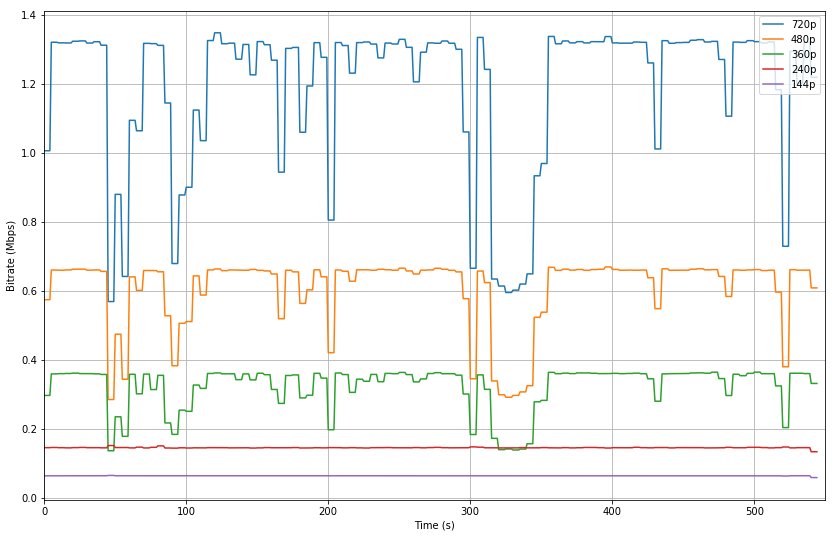

In [6]:
fig = plt.figure(figsize=(14, 9))

ax = fig.add_subplot(111)

cmap = plt.get_cmap('copper') 
colors = iter(cmap(np.linspace(0,1,3)))

labels = ['low', 'medium', 'high']

ql_cols = reversed(["quality_%d" % i for i in range(1,6)])
ql_labels = ['720p', '480p', '360p', '240p', '144p']
   
for ql, ql_label in zip(ql_cols, ql_labels):
    
    dfql_segs = dfsegs.loc[:,ql] / 1024 / 1024
    
    dfql_segs = dfql_segs.repeat(segment_duration)
    dfql_segs = dfql_segs.reset_index(drop=True)    
    
    ax.plot(dfql_segs.index, dfql_segs, label=ql_label)
  
ax.grid()
ax.legend()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Bitrate (Mbps)")
ax.set_xlim([0, 550])